In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from upsetplot import UpSet

In [4]:
# Load the CSV file as a DataFrame
data = pd.read_csv("filtered_data_era.csv")

           eid concept_name    drug_era_id  count
0      1000528     morphine   979252592549      1
1      1000643     morphine  1400159381268      1
2      1000805   loperamide  1073741876419      1
3      1001259   loperamide   652835095136      1
4      1001542   loperamide  1228360670004      1
...        ...          ...            ...    ...
72390  6024166   loperamide   120259120124      1
72391  6024368   loperamide    94489364255      1
72392  6024368   loperamide   197568518265      1
72393  6024447   loperamide  1056561968644      1
72394  6024763   loperamide  1013612299388      1

[72395 rows x 4 columns]
All eids have 2 or fewer occurrences.
  concept_name  count
0     fentanyl   1684
1   loperamide  15660
2    methadone     82
3     morphine   7217


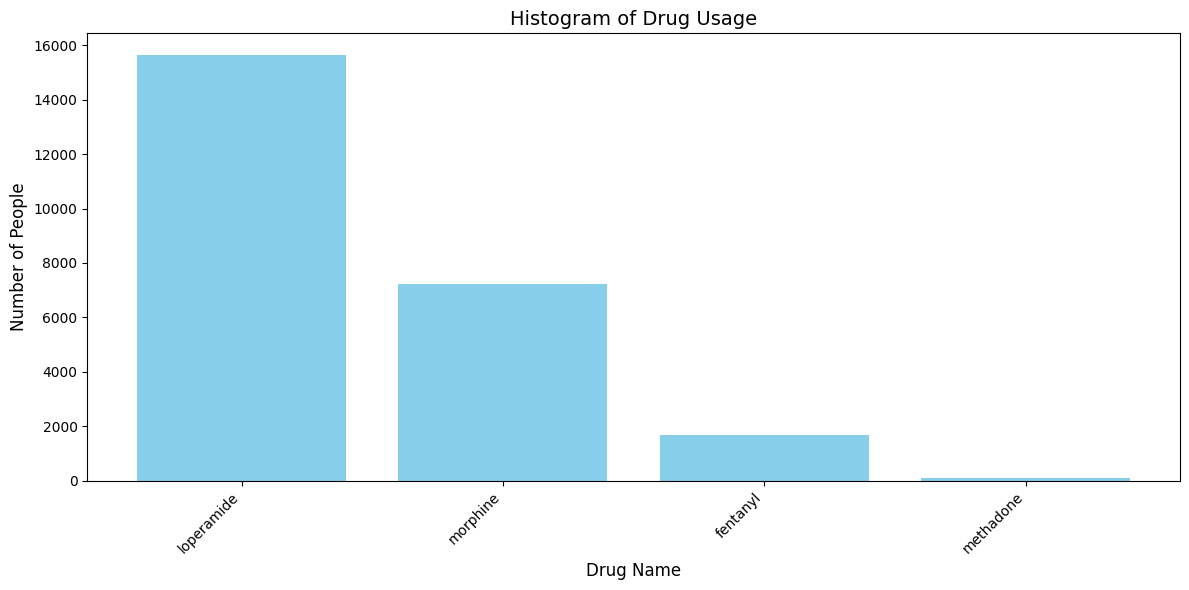

In [56]:
# Create the histogram
plt.figure(figsize=(12, 6))
eid_counts = data.groupby(["eid", "concept_name"]).size().reset_index(name="count")
same_data = (
    data.groupby(["eid", "concept_name", "drug_era_id"])
    .size()
    .reset_index(name="count")
)
drug_counts = eid_counts.groupby("concept_name").size().reset_index(name="count")
print(drug_counts)
# Sort for better visualization
drug_counts = drug_counts.sort_values(by="count", ascending=False)

plt.bar(drug_counts["concept_name"], drug_counts["count"], color="skyblue")
plt.xlabel("Drug Name", fontsize=12)
plt.ylabel("Number of People", fontsize=12)
plt.title("Histogram of Drug Usage", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.tight_layout()

# Save the plot as an image file
plt.savefig("drug_usage_histogram.png", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()

  concept_name  drug_exposure_count
3     morphine               113566
1   loperamide               106541
0     fentanyl                73888
2    methadone                 3181


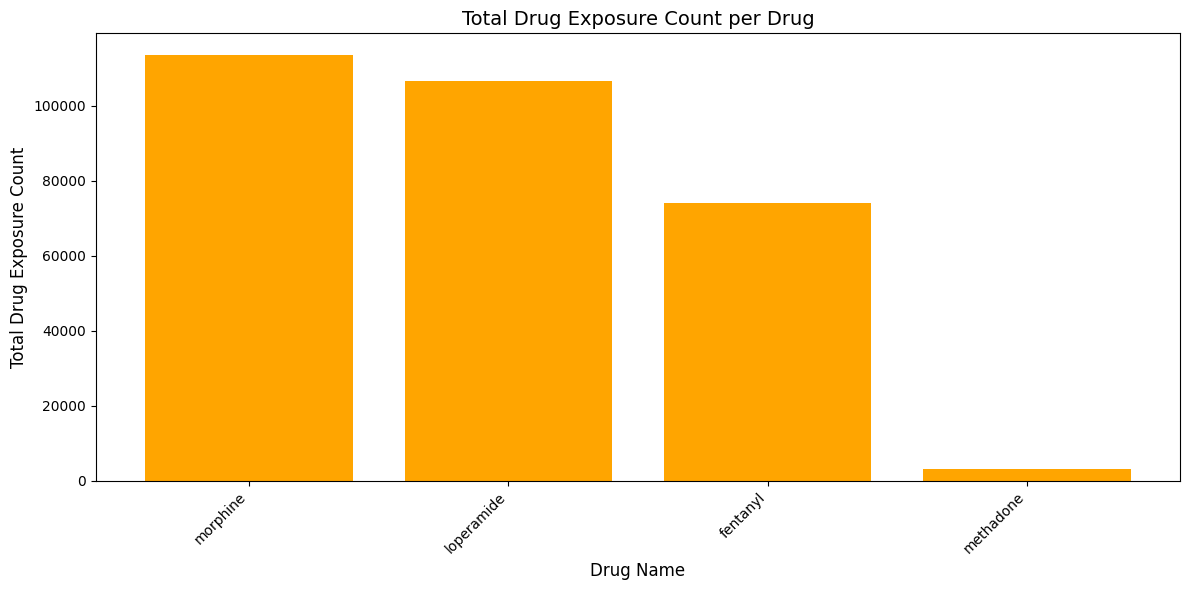

In [19]:
# Create the histogram for total drug_exposure_count
plt.figure(figsize=(12, 6))
drug_exposure_totals = (
    data.groupby("concept_name")["drug_exposure_count"].sum().reset_index()
)

# Sort for better visualization
drug_exposure_totals = drug_exposure_totals.sort_values(
    by="drug_exposure_count", ascending=False
)
print(drug_exposure_totals)
plt.bar(
    drug_exposure_totals["concept_name"],
    drug_exposure_totals["drug_exposure_count"],
    color="orange",
)
plt.xlabel("Drug Name", fontsize=12)
plt.ylabel("Total Drug Exposure Count", fontsize=12)
plt.title("Total Drug Exposure Count per Drug", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.tight_layout()

# Save the plot as an image file
plt.savefig("total_drug_exposure_count_histogram.png", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()

In [32]:
upset_data = data.groupby(["eid", "concept_name"]).size()
print(upset_data)
long_df = data.melt(
    id_vars=["eid", "concept_name", "drug_era_id"],
    value_vars=["drug_era_start_date", "drug_era_end_date"],
    var_name="date_type",
    value_name="date",
)
# Sort by eid (and optionally concept_name or other columns)
long_df = long_df.sort_values(by=["eid", "concept_name", "drug_era_id", "date_type"])
# Output the result
print(long_df)

eid      concept_name
1000528  morphine        1
1000643  morphine        1
1000805  loperamide      1
1001259  loperamide      1
1001542  loperamide      1
                        ..
6024003  loperamide      2
6024166  loperamide      1
6024368  loperamide      2
6024447  loperamide      1
6024763  loperamide      1
Length: 24643, dtype: int64
            eid concept_name    drug_era_id            date_type        date
103095  1000528     morphine   979252592549    drug_era_end_date  2013-12-03
27573   1000528     morphine   979252592549  drug_era_start_date  2013-06-02
122190  1000643     morphine  1400159381268    drug_era_end_date  2008-11-08
46668   1000643     morphine  1400159381268  drug_era_start_date         NaN
112514  1000805   loperamide  1073741876419    drug_era_end_date  2013-09-05
...         ...          ...            ...                  ...         ...
31610   6024368   loperamide   197568518265  drug_era_start_date         NaN
134309  6024447   loperamide  1056561

<Figure size 1200x800 with 0 Axes>

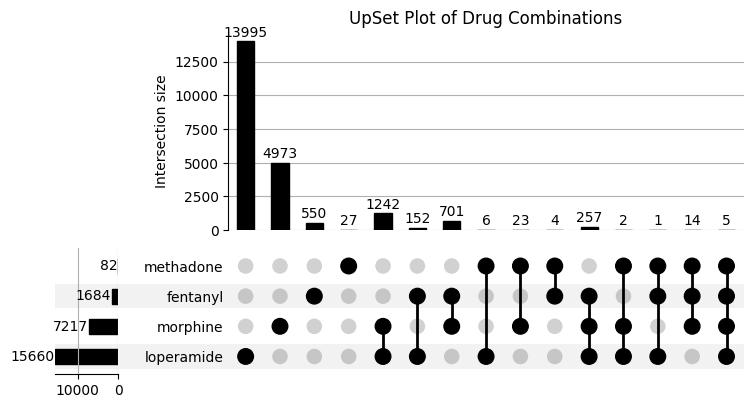

In [36]:
# Upset plot
# Create a set of drug combinations per person (eid)
# Each person will have a set of drugs they are taking
# Pivot the data to create a presence/absence matrix
binary_matrix = (
    data.groupby(["eid", "concept_name"])
    .size()
    .unstack(fill_value=0)
    .applymap(lambda x: 1 if x > 0 else 0)
)
# Count unique combinations
combination_counts = binary_matrix.groupby(list(binary_matrix.columns)).size()
# Create and plot the UpSet plot
upset = UpSet(combination_counts, show_counts=True, show_percentages=False)
plt.figure(figsize=(12, 8))
upset.plot()

# Show the plot
plt.title("UpSet Plot of Drug Combinations")

# Save the plot as an image file
plt.savefig("upset_plot_drug_combinations.png", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()